# Rough verification

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cm
import warnings
warnings.filterwarnings("ignore")
import xgcm

import os
from pathlib import Path
from dask.distributed import Client

client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/37051/status,
Dashboard: /proxy/37051/status,Workers: 2
Total threads: 2,Total memory: 9.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43165,Workers: 2
Dashboard: /proxy/37051/status,Total threads: 2
Started: Just now,Total memory: 9.00 GiB
Comm: tcp://127.0.0.1:40607,Total threads: 1
Dashboard: /proxy/44967/status,Memory: 4.50 GiB
Nanny: tcp://127.0.0.1:35499,


In [2]:
thetao3d = xr.open_dataset('/scratch/x77/cy8964/access-om3/archive/25km_jra_ryf-obc/output000/access-om3.mom6.3d.thetao.1mon.mean.1900.nc')

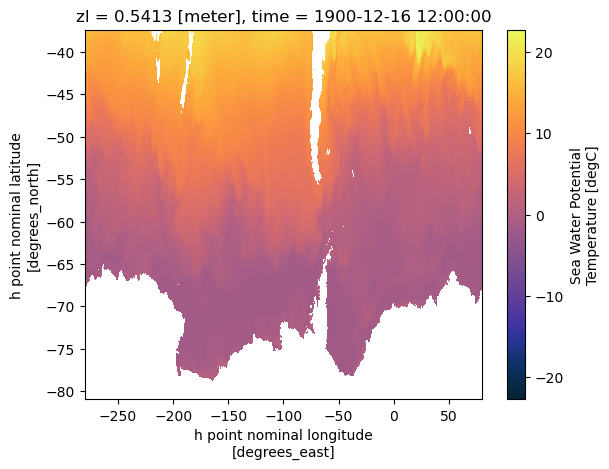

In [3]:
thetao3d.thetao.isel(time = -1).isel(zl = 0).plot(cmap = cm.cm.thermal)

In [4]:
scalar = xr.open_dataset('/scratch/x77/cy8964/access-om3/archive/25km_jra_ryf-obc/output000/access-om3.mom6.scalar.1day.snap.1900.nc')
scalar

<xarray.Dataset> Size: 58kB
Dimensions:                                (scalar_axis: 1, time: 365)
Coordinates:
  * scalar_axis                            (scalar_axis) float64 8B 0.0
  * time                                   (time) object 3kB 1900-01-02 00:00...
Data variables: (12/19)
    soga                                   (time, scalar_axis) float64 3kB ...
    thetaoga                               (time, scalar_axis) float64 3kB ...
    tosga                                  (time, scalar_axis) float64 3kB ...
    sosga                                  (time, scalar_axis) float64 3kB ...
    total_salt_Flux_Added                  (time, scalar_axis) float64 3kB ...
    total_salt_Flux_In                     (time, scalar_axis) float64 3kB ...
    ...                                     ...
    total_prsn                             (time, scalar_axis) float64 3kB ...
    total_lprec                            (time, scalar_axis) float64 3kB ...
    total_ficeberg                         (time, scalar_axis) float64 3kB ...
    total_friver                           (time, scalar_axis) float64 3kB ...
    total_net_massout                      (time, scalar_axis) float64 3kB ...
    total_net_massin                       (time, scalar_axis) float64 3kB ...
Attributes:
    title:      ACCESS-OM3
    grid_type:  regular
    grid_tile:  N/A

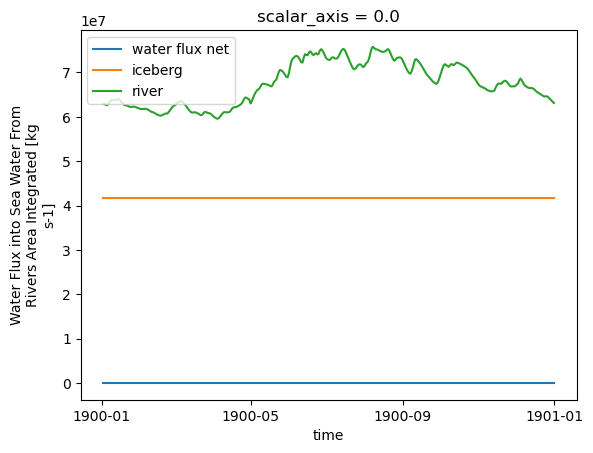

In [5]:
scalar.total_wfo.plot(label = 'water flux net')
scalar.total_ficeberg.plot(label = 'iceberg')
scalar.total_friver.plot(label = 'river')
plt.legend()

copy from Andrew's script: https://github.com/aekiss/access-eval-recipes/blob/ef120fa/ocean/runoff_budget.ipynb

issue: https://github.com/ACCESS-NRI/access-om3-configs/issues/410

In [6]:
jra55dopaths = {
    'areacello': '/g/data/qv56/replicas/input4MIPs/CMIP6/OMIP/MRI/MRI-JRA55-do-1-4-0/ocean/fx/areacello/gr/v20190429/areacello_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-4-0_gr.nc',
    'friver': '/g/data/vk83/configurations/inputs/JRA-55/RYF/v1-4/data/RYF.friver.1990_1991.nc',
    'licalvf': '/g/data/vk83/configurations/inputs/JRA-55/RYF/v1-4/data/RYF.licalvf.1990_1991.nc'
}

In [7]:
jra55do = xr.open_mfdataset([ v for v in jra55dopaths.values() ])


In [9]:
jra55doGrid = xgcm.Grid(jra55do,
                        periodic=['X'],
                        metrics = { ('X', 'Y'): ['areacello']})


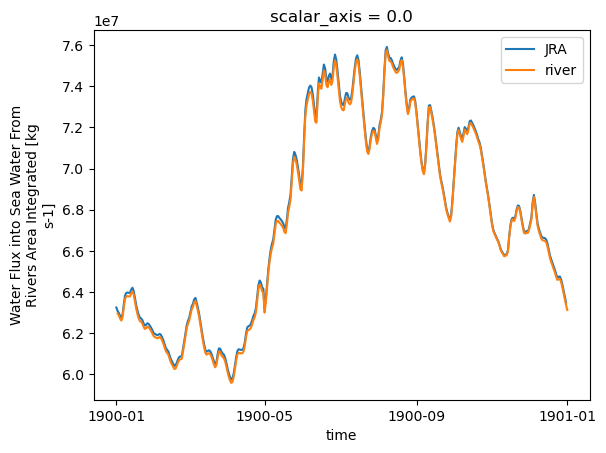

In [12]:
jra55doGrid.integrate(jra55do.friver.sel(lat = slice(-90,-37.5)), ['X', 'Y']).plot(label = 'JRA')
scalar.total_friver.plot(label = 'river')
plt.legend()

# For including ice shelf cavities - maybe need to set JRA55do friver file to zero below a certain latitude.

Also, check that 8km grid will work with Anton's runoff regridding